#    Zomato data analysis project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [2]:
df.shape

(148, 7)

In [3]:
# Dataset Information

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


1> First step we cleaning data 

In [4]:
# Cleaning wrong fornat of 'rating'

#df['rate'] = df['rate'].str.replace("/5","")
#df.head()

## or ##

def rate_change(x):      
    x = str(x).split('/')       # str(x) es liye because rating ka type str    ## .split() ye vha se us hta deti h usse aage tak ki value ko
    x = x[0]
    return float(x)

df['rate'] = df['rate'].apply(rate_change)  
df.head()  


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [6]:
# For changing right datatype

df['rate'].astype('float64')
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [7]:
df.head(2)          

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [8]:
df.drop(['name'], inplace=True, axis=1)
df

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,800,Buffet
1,Yes,No,4.1,787,800,Buffet
2,Yes,No,3.8,918,800,Buffet
3,No,No,3.7,88,300,Buffet
4,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...
143,No,No,3.3,0,100,Dining
144,No,No,3.3,0,150,Dining
145,Yes,No,4.0,771,450,Dining
146,No,No,3.0,98,800,Dining


In [9]:
group_type = df.groupby(["listed_in(type)"]).sum()
group_type

,online_order,book_table,rate,votes,approx_cost(for two people)
listed_in(type),,,,,
Buffet,YesYesYesNoNoYesNo,YesNoNoNoNoNoNo,26.9,3028,4700
Cafes,YesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesN...,YesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo,86.6,6434,12550
Dining,YesYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoY...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,392.9,20363,39300
other,YesYesYesYesYesYesNoNo,NoNoNoNoYesYesNoNo,31.3,9367,5350


In [10]:
max(group_type["rate"])


392.9

In [11]:
#High rate group
group_type["rate"].idxmax() 


'Dining'

In [12]:
#Highest group rate value

ma_rate_velue = group_type["rate"].max()
ma_rate_velue

np.float64(392.9)

In [13]:
 # For Checking missing value(Null value)    #If yes so .drop() or .dropna()  If no so .fillna()

df.isnull().sum()  

online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 148 non-null    object 
 1   book_table                   148 non-null    object 
 2   rate                         148 non-null    float64
 3   votes                        148 non-null    int64  
 4   approx_cost(for two people)  148 non-null    int64  
 5   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.1+ KB


Q1. What types of restaurant do the majority of customers order from?

In [15]:
resto = df['listed_in(type)']               ## ye sir se puchna h  ke max customers Dining se order kar rhe h lekin Other kyo show ho rha h?
max_resto = np.max(resto)
print(f'Majority of customers order from : {max_resto}')

Majority of customers order from : other


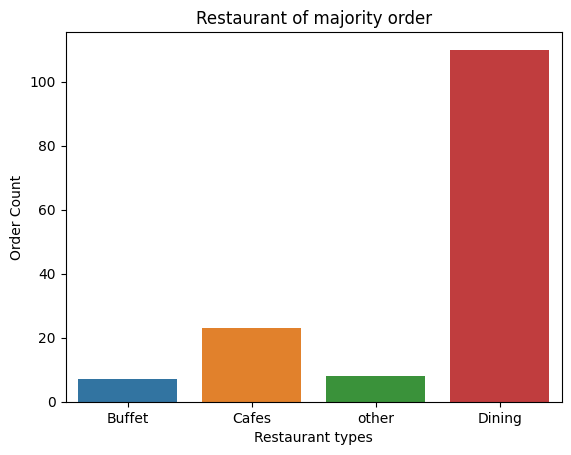

In [16]:
#Using countplot for representint throw Graph  # Right # 

sns.countplot(x="listed_in(type)", data=df, hue="listed_in(type)")

plt.title("Restaurant of majority order")
plt.xlabel("Restaurant types")
plt.ylabel("Order Count")
plt.show()

# Conclusion - Majority of customers order from Dining type restaurant

In [17]:
df.head()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,800,Buffet
1,Yes,No,4.1,787,800,Buffet
2,Yes,No,3.8,918,800,Buffet
3,No,No,3.7,88,300,Buffet
4,No,No,3.8,166,600,Buffet


Q2. How many votes has each types of restaurant received from coustomers?

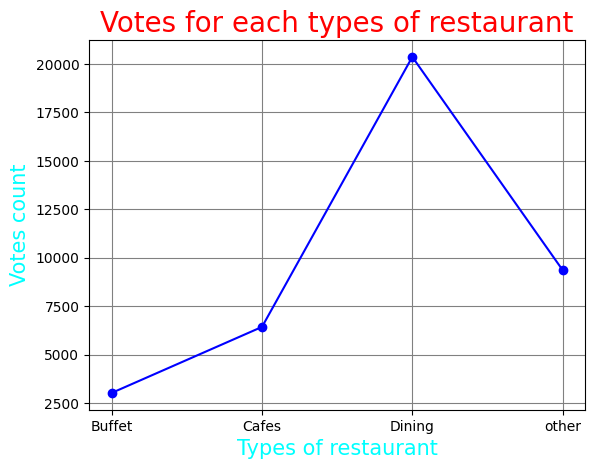

In [18]:
#sns.barplot(x="listed_in(type)", y="votes", data=df, hue="listed_in(type)")

grouped_data = df.groupby("listed_in(type)")["votes"].sum()    #### V.IMP- Because Jab mera dataset sns(seaborn) me h use matplotlib ka graph banana h to | df.groupby('')[''].sum() | use karenge. fir next strp me h--
res = pd.DataFrame({"votes":grouped_data})

plt.plot(res, color="b", marker="o")     # Use Plot in matplotlib

plt.title("Votes for each types of restaurant", c="r", size=20)
plt.xlabel("Types of restaurant", color="cyan", size=15)
plt.ylabel("Votes count", color="cyan", size=15)
plt.grid(color='gray')
plt.show()

# Conclusion - Dining types restaurant has received maximum votes

In [19]:
df

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,800,Buffet
1,Yes,No,4.1,787,800,Buffet
2,Yes,No,3.8,918,800,Buffet
3,No,No,3.7,88,300,Buffet
4,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...
143,No,No,3.3,0,100,Dining
144,No,No,3.3,0,150,Dining
145,Yes,No,4.0,771,450,Dining
146,No,No,3.0,98,800,Dining


Q3. What are the ratings that the majority of restaurant have received?

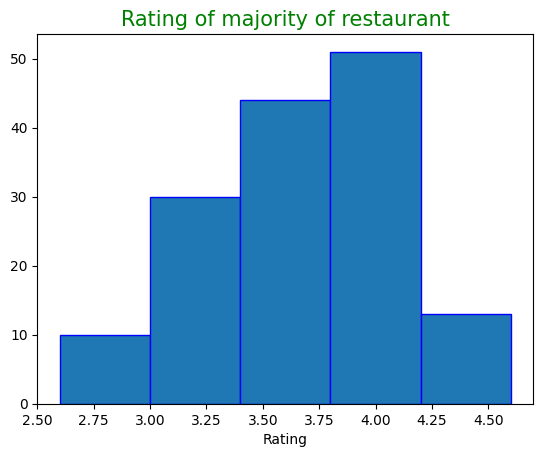

In [20]:
# For finding Rating Histogram plot is best.

plt.hist(df['rate'], bins=5, edgecolor="b")

plt.title("Rating of majority of restaurant", c="g", size=15)
plt.xlabel("Rating")
plt.show()

# Conclusion - The ratings that the majority of restaurant have received from 3.5 to 4

In [21]:
df.head()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,800,Buffet
1,Yes,No,4.1,787,800,Buffet
2,Yes,No,3.8,918,800,Buffet
3,No,No,3.7,88,300,Buffet
4,No,No,3.8,166,600,Buffet


Q4. Zomato has observed that most couples order most of their food online. What is their average spending on each order? 

In [22]:
"""
Online_order_res = df[df['online_order'] == "Yes"]

average_spending =Online_order_res['approx_cost(for two people)'].mean()

print(f'Average spending on each order : {average_spending}')
"""

'\nOnline_order_res = df[df[\'online_order\'] == "Yes"]\n\naverage_spending =Online_order_res[\'approx_cost(for two people)\'].mean()\n\nprint(f\'Average spending on each order : {average_spending}\')\n'

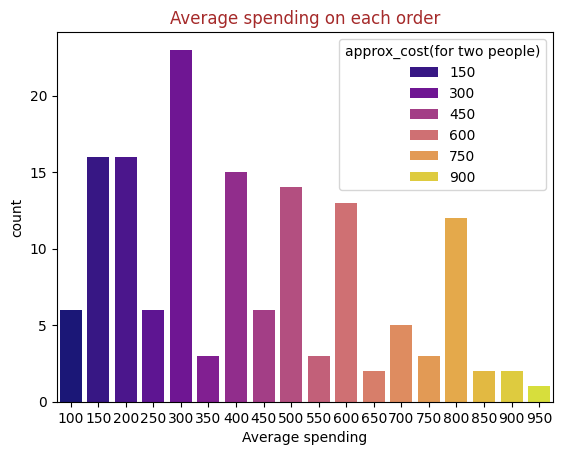

In [23]:
# For finding Average we use Histplot in Seaborn.
# But Countplot give Exact average.

sns.countplot(x="approx_cost(for two people)", data=df, hue="approx_cost(for two people)", palette="plasma")

plt.title("Average spending on each order",c="brown")
plt.xlabel("Average spending")
plt.show()

# Conclusion - The majority of couples preferr restaurants with an approximate cost of 300 rupees

In [24]:
df.head()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,800,Buffet
1,Yes,No,4.1,787,800,Buffet
2,Yes,No,3.8,918,800,Buffet
3,No,No,3.7,88,300,Buffet
4,No,No,3.8,166,600,Buffet


Q5. Which mode (online or offline) has received the maximum rating?

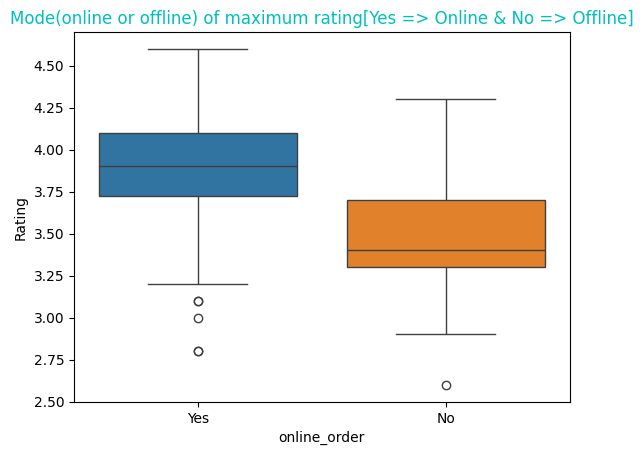

In [25]:
# Ham x = 'Online_order' chose karenge  y = 'rate' bas  kyonki |'Yes' mtlb Online_order | and |'No' mtlb Offline_order|
#Use: Boxplot for best

sns.boxplot(x="online_order", y="rate", data=df, hue="online_order")   # hue="online_order" Because online_order ke bich hi Diffenenciat karna h

plt.title("Mode(online or offline) of maximum rating[Yes => Online & No => Offline]", c="c")
plt.ylabel("Rating")
plt.show()

# Conclusion - The rating of online-order from 4.25 to 3.5 and the rating of offline_order from 3.75 to 3.25 So Online mode has received the maximum rating.

In [26]:
df

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,800,Buffet
1,Yes,No,4.1,787,800,Buffet
2,Yes,No,3.8,918,800,Buffet
3,No,No,3.7,88,300,Buffet
4,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...
143,No,No,3.3,0,100,Dining
144,No,No,3.3,0,150,Dining
145,Yes,No,4.0,771,450,Dining
146,No,No,3.0,98,800,Dining


Q6. Which type of restaurant received more offline orders, so that Zomato can provide customers wth some good offers?

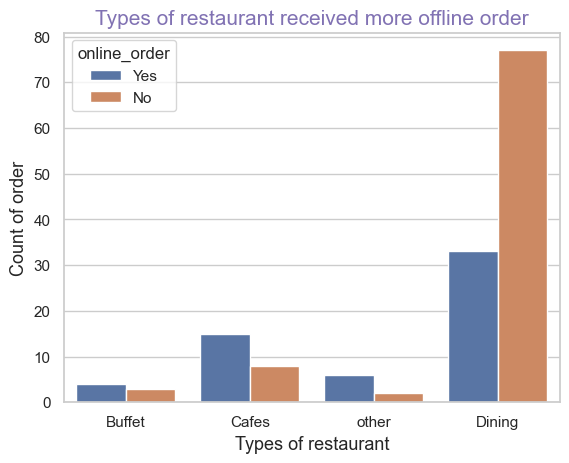

In [27]:
# ye bhi thik-thak hi h es Q6 ke liye But niche Heatmap  ke throw vala pure 100% Perfect sahi ekdam h

sns.set(style="whitegrid")
sns.countplot(x="listed_in(type)", data=df, hue="online_order")

plt.title("Types of restaurant received more offline order", color="m", size=15)
plt.xlabel("Types of restaurant", size=13)
plt.ylabel("Count of order", size=13)
plt.show()

                                                         or

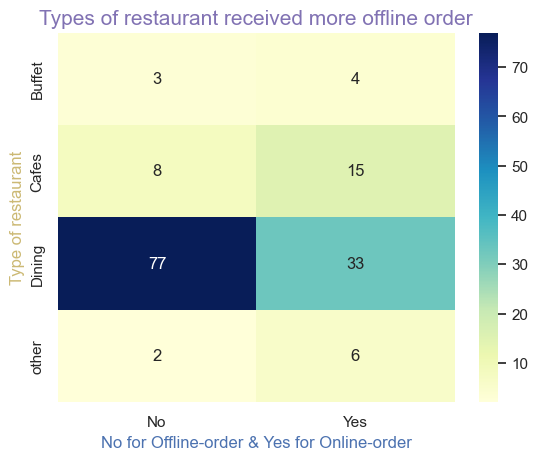

In [28]:
#Use: Heatmap 

pivot = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)

sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d")

plt.title("Types of restaurant received more offline order", color="m", size=15)
plt.xlabel("No for Offline-order & Yes for Online-order", c='b')
plt.ylabel("Type of restaurant", c='y')
plt.show()


# CONCLUSION -  Dining restaurants primarily accept more offline orders.